# Task 0 - Warm up with the nation
## Imports

In [4]:
# visualize using matplotlib and/or seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## Data paths

In [5]:
data_paths = {
    'riket2023_åk9_np': "data/riket2023_åk9_np.xlsx",
    'betyg_o_prov_riksnivå': "data/betyg_o_prov_riksnivå.xlsx",
    'visualizations': "visualizations"
}

nationwide2023_grade9_nt = data_paths['riket2023_åk9_np']
grades_and_tests_national_level = data_paths['betyg_o_prov_riksnivå']
visualizations = data_paths['visualizations']

# Task 0A 
## Read and process Excel file 

In [6]:
# Define the sheet names
sheet_names = ['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

# Initialize an empty dictionary to store DataFrames for each sheet
dfs = {}

# Loop through the sheet names and read each sheet into a DataFrame
for sheet_name in sheet_names:
    df = pd.read_excel(nationwide2023_grade9_nt, skiprows=8, sheet_name=sheet_name)
    
    # Rename the columns directly
    df.columns = [
        "Plats", "Huvudman",
        "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)",
        "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)",
        "Totalt (Poäng)", "Flickor (Poäng)", "Pojkar (Poäng)"
    ]
    
    # Store the DataFrame in the dictionary
    dfs[sheet_name] = df # dfs contains DataFrames for each sheet with the correct column names

# Access the DataFrame sheet for the subjects:
df_english = dfs['Engelska'].head()
df_math = dfs['Matematik'].head()
df_swedish = dfs['Svenska'].head()
df_swedish_as_secondlang = dfs['Svenska som andraspråk'].head()

# Output test
df_math.head()

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


# Task 0B
## Quantity of students with an F in math: Total, Boys, Girls

Total:11637.494000000006
Girls:5824.923999999999
Boys:5797.889999999999


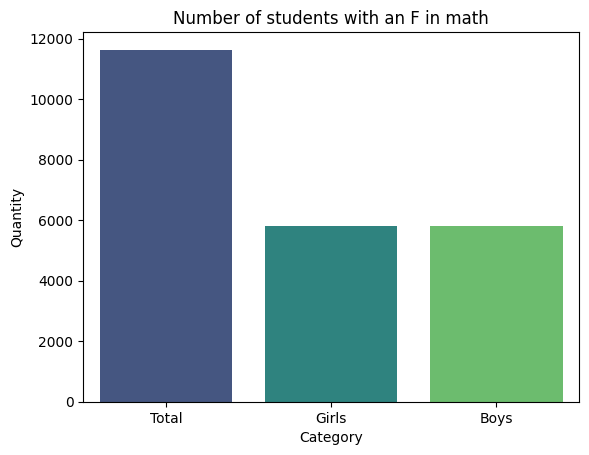

In [7]:
# Calculations to determine the number of students with an F in math, broken down by total, boys, and girls.

# Total
total_ae_nmr = df_math['Totalt (A-F)'][0] * (df_math['Totalt (A-E)'][0] / 100)  # 106766 * 0.891 = 95128.506 (total number of students with grades A-E)
quantity_f_total = df_math['Totalt (A-F)'][0] - total_ae_nmr  # 106766 - 95128.506 = 11637.493 (total F quantity)
# Girls
girls_ae_nmr = df_math['Flickor (A-F)'][0] * (df_math['Flickor (A-E)'][0] / 100)  # 51548 * 0.887 = 45723.076 (number of girls with grades A-E)
quantity_f_girls = df_math['Flickor (A-F)'][0] - girls_ae_nmr  # 51548 - 45723.076 = 5824.924 (total F quantity for girls)
# Boys
boys_ae_nmr = df_math['Pojkar (A-F)'][0] * (df_math['Pojkar (A-E)'][0] / 100)  # 55218 * 0.895 = 49420.11 (number of boys with grades A-E)
quantity_f_boys = df_math['Pojkar (A-F)'][0] - boys_ae_nmr  # 55218 - 49420.11 = 5797.89 (total F quantity for boys)

# Outputting the values.
print(f"Total:{quantity_f_total}\nGirls:{quantity_f_girls}\nBoys:{quantity_f_boys}")

# Create DataFrame for plotting
quantity_f_math_data = pd.DataFrame({
    'Category': ['Total', 'Girls', 'Boys'],
    'Quantity': [quantity_f_total, quantity_f_girls, quantity_f_boys]
})

# Plotting a grouped bar plot
sns.barplot(data=quantity_f_math_data, x='Category', y='Quantity', hue='Category', palette='viridis', legend=False)
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Number of students with an F in math')

# Save graph as a PNG file with color
plt.savefig('visualizations/nmr_students_f_math_plot_for_fun(Task 0B).png', bbox_inches='tight', facecolor='white')

plt.show()

# Task 0C
## Plotting bar chart for total points for the different subjects.

15.7, 11.9, 13.6, 9.4


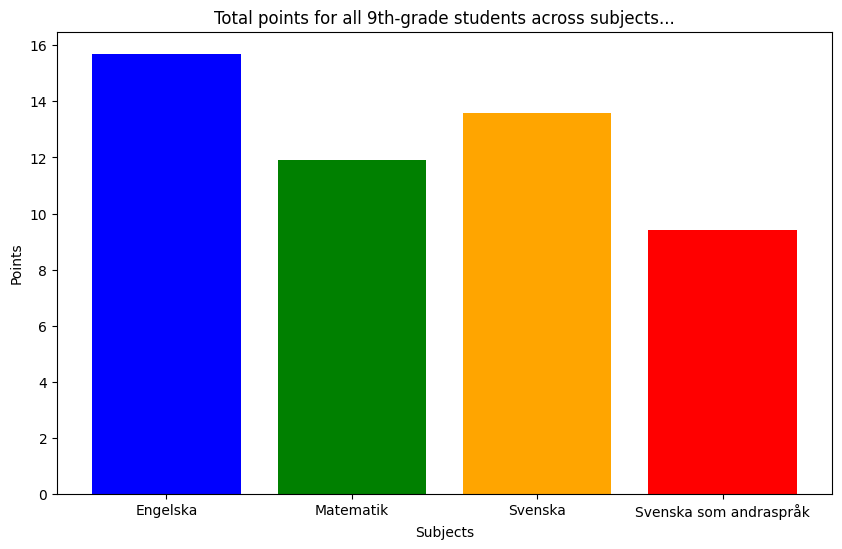

In [8]:
# Total points of the total students in 9th grade
total_points_english = df_english['Totalt (Poäng)'][0] 
total_points_math = df_math['Totalt (Poäng)'][0]
total_points_swe = df_swedish['Totalt (Poäng)'][0]
total_points_swe_as_seclang = df_swedish_as_secondlang['Totalt (Poäng)'][0]

print(f"{total_points_english}, {total_points_math}, {total_points_swe}, {total_points_swe_as_seclang}")

total_points = [total_points_english, total_points_math, total_points_swe, total_points_swe_as_seclang]  # Values
categories = sheet_names # Subjects

# Define colors for each bar
colors = ['blue', 'green', 'orange', 'red']

# Adjusting figure size
plt.figure(figsize=(10, 6))

plt.bar(categories, total_points, color=colors)

plt.title('Total points for all 9th-grade students across subjects...')
plt.xlabel('Subjects') # Title is already clear enough
plt.ylabel('Points') # Title is already clear enough

# Save graph as a PNG file with color
plt.savefig('visualizations/total_points_for_subjects_A-F(Task 0C).png', bbox_inches='tight', facecolor='white')

# Show the graph
plt.show()

# Task 0D

## Four different bar charts in subplots showing the total points for the different subjects for the various entities

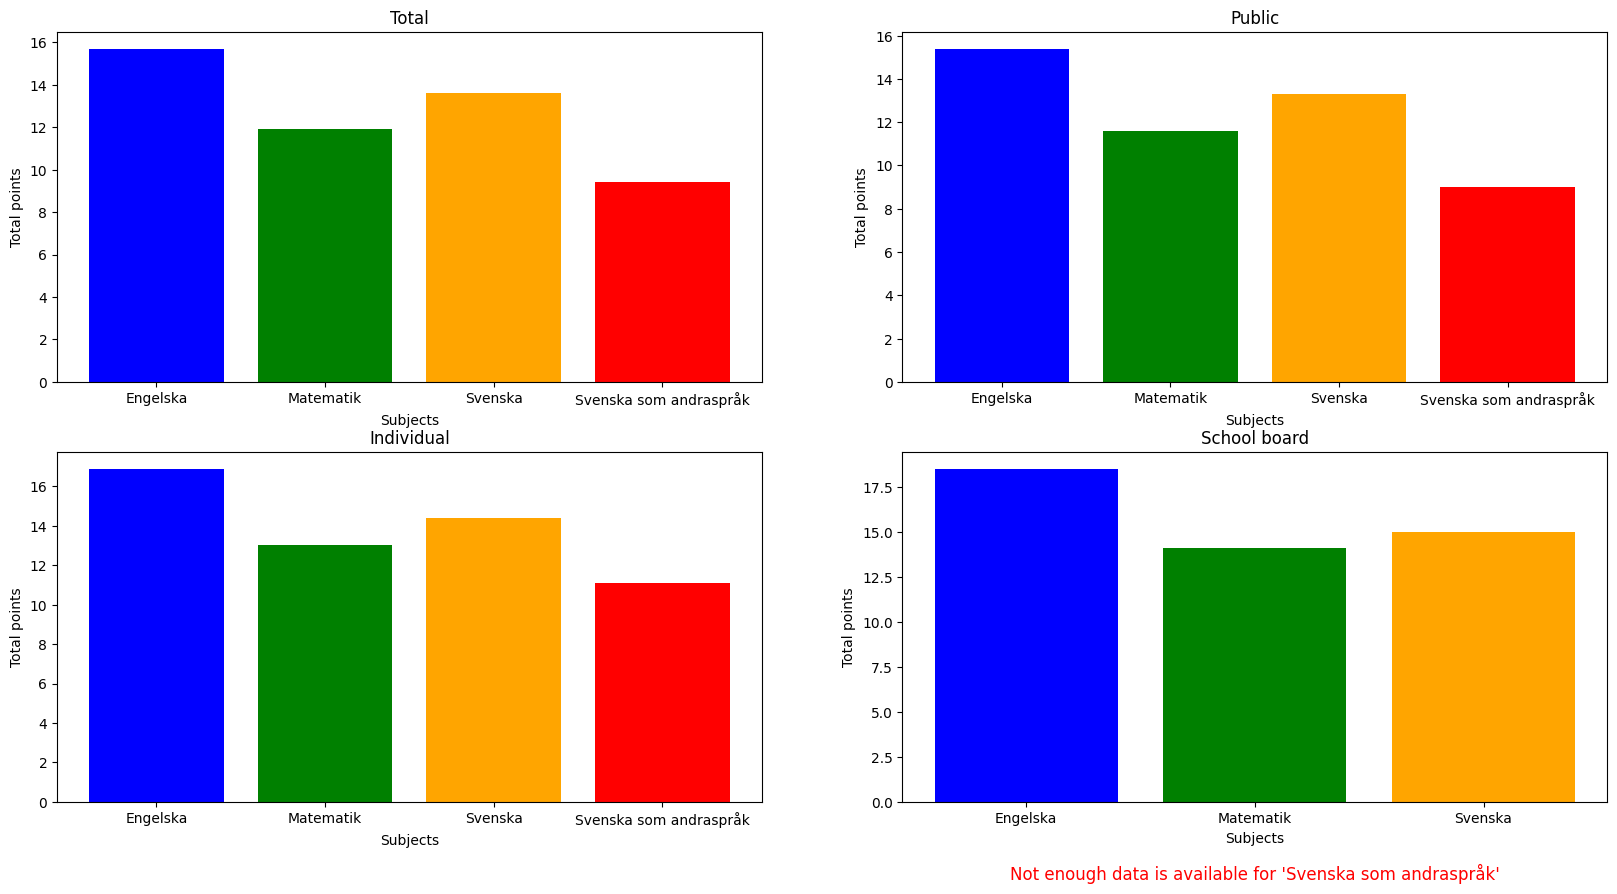

In [9]:
# Dictionary for 'Huvudman: Samtliga'
huvudman_samtliga = {
    'Engelska': df_english['Totalt (Poäng)'][0],
    'Matematik': df_math['Totalt (Poäng)'][0],
    'Svenska': df_swedish['Totalt (Poäng)'][0],
    'Svenska som andraspråk': df_swedish_as_secondlang['Totalt (Poäng)'][0]
}

# Dictionary for 'Huvudman: Kommunal'
huvudman_kommunal = {
    'Engelska': df_english['Totalt (Poäng)'][1],
    'Matematik': df_math['Totalt (Poäng)'][1],
    'Svenska': df_swedish['Totalt (Poäng)'][1],
    'Svenska som andraspråk': df_swedish_as_secondlang['Totalt (Poäng)'][1]
}

# Dictionary for 'Huvudman: Enskild'
huvudman_enskild = {
    'Engelska': df_english['Totalt (Poäng)'][2],
    'Matematik': df_math['Totalt (Poäng)'][2],
    'Svenska': df_swedish['Totalt (Poäng)'][2],
    'Svenska som andraspråk': df_swedish_as_secondlang['Totalt (Poäng)'][2]
}

# Filter rows where 'Huvudman' is 'Skolverket' and select the first matching row
skolverket_row_modified = df_swedish_as_secondlang[df_swedish_as_secondlang['Huvudman'] == 'Skolverket'].iloc[0]
# Convert the 'Totalt (Poäng)' column to numeric (if it's not already)
skolverket_row_modified['Totalt (Poäng)'] = pd.to_numeric(skolverket_row_modified['Totalt (Poäng)'], errors='coerce')
# Replace all occurrences of '..' with '0' in the 'Totalt (Poäng)' column of the Skolverket row
skolverket_row_modified.replace('..', '0', inplace=True)

# Dictionary for 'Huvudman: Skolverket'
huvudman_skolverket = {
    'Engelska': df_english['Totalt (Poäng)'][3],
    'Matematik': df_math['Totalt (Poäng)'][3],
    'Svenska': df_swedish['Totalt (Poäng)'][3],
    'Svenska som andraspråk': skolverket_row_modified['Totalt (Poäng)'] # Added converted and replaced value to the dict for subplots
}

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Draw a bar chart for the entity "Samtliga" in the first subplot (axs[0, 0])
axs[0, 0].bar(huvudman_samtliga.keys(), huvudman_samtliga.values(), color=colors) # Using the dict huvudman_samtliga, keys represents x-axis and values represents y-axis
axs[0, 0].set_title('Total')
axs[0, 0].set_xlabel('Subjects')
axs[0, 0].set_ylabel('Total points')

# Draw a bar chart for the entity "Kommunal" in the second subplot (axs[0, 1])
axs[0, 1].bar(huvudman_kommunal.keys(), huvudman_kommunal.values(), color=colors) # Using the dict huvudman_kommunal, keys represents x-axis and values represents y-axis
axs[0, 1].set_title('Public')
axs[0, 1].set_xlabel('Subjects')
axs[0, 1].set_ylabel('Total points')

# Draw a bar chart for the entity "Enskild" in the second subplot (axs[0, 1])
axs[1, 0].bar(huvudman_enskild.keys(), huvudman_enskild.values(), color=colors) # Using the dict huvudman_enskild keys, represents x-axis and values represents y-axis
axs[1, 0].set_title('Individual')
axs[1, 0].set_xlabel('Subjects')
axs[1, 0].set_ylabel('Total points')

# Draw a bar chart for the entity "Skolverket" in the fourth subplot (axs[1, 1])
axs[1, 1].bar(huvudman_skolverket.keys(), huvudman_skolverket.values(), color=colors) # Using the dict huvudman_skolverket, keys represents x-axis and values represents y-axis
axs[1, 1].set_title('School board')
axs[1, 1].set_xlabel('Subjects')
axs[1, 1].set_ylabel('Total points')

# Add a note to the subplot where 'Svenska som andraspråk' is plotted
note_text = "Not enough data is available for 'Svenska som andraspråk'"
axs[1, 1].text(1.0, -4, note_text, ha='center', va='center', fontsize=12, color='red')

# Save graph as a PNG file with color
plt.savefig('visualizations/total_points_subplots(Task 0D).png', bbox_inches='tight', facecolor='white')

plt.show()

# Task 0E
## Bar chart in subplots showing the total points for the different subjects for the various entities


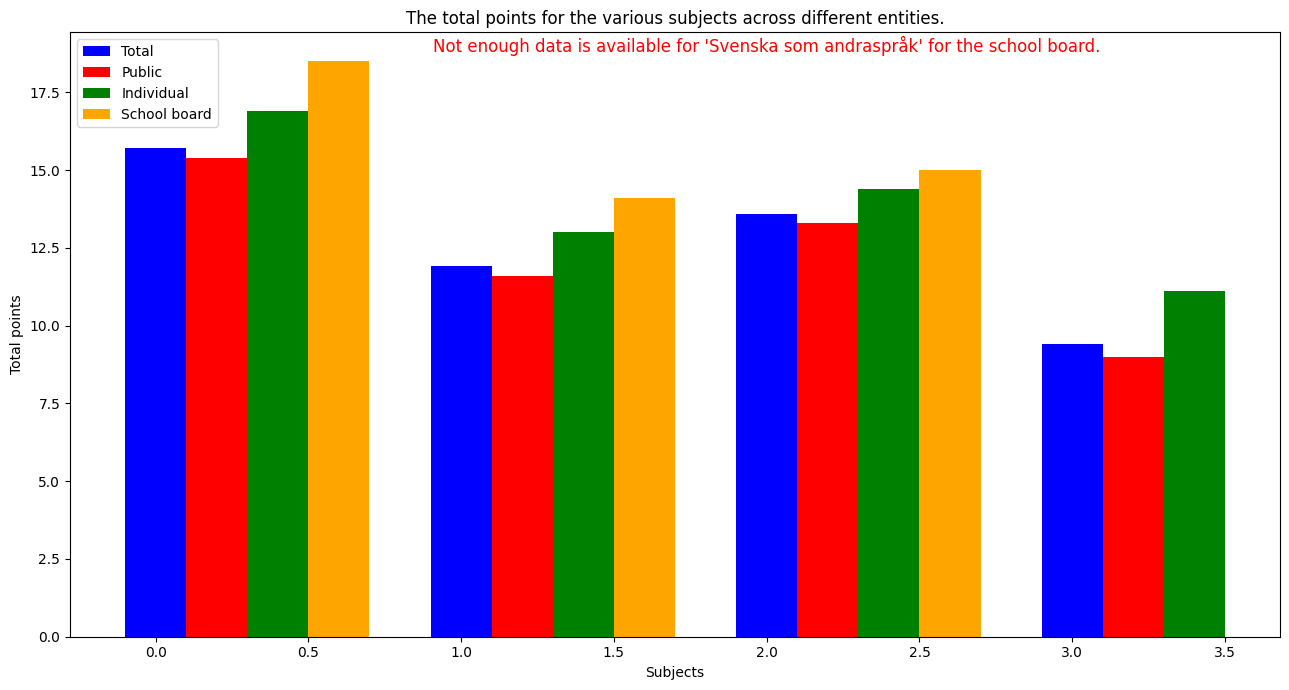

In [11]:
# Create a figure and a subplot
fig, axs = plt.subplots(figsize=(13, 7))

# Width for each bar
bar_width = 0.2

# Create x-axis coordinates for each entity
x_axis_samtliga = np.arange(len(huvudman_samtliga))
x_axis_kommunal = [x + bar_width for x in x_axis_samtliga]
x_axis_enskild = [x + 2*bar_width for x in x_axis_samtliga]
x_axis_skolverket = [x + 3*bar_width for x in x_axis_samtliga]

# Draw a bar chart for each entity
axs.bar(x_axis_samtliga, huvudman_samtliga.values(), color='blue', width=bar_width, label='Total') # huvudman_samtliga dict used for values from - Task 0D
axs.bar(x_axis_kommunal, huvudman_kommunal.values(), color='red', width=bar_width, label='Public') # huvudman_kommunal dict used for values from - Task 0D
axs.bar(x_axis_enskild, huvudman_enskild.values(), color='green', width=bar_width, label='Individual') # huvudman_enskild dict used for values from - Task 0D
axs.bar(x_axis_skolverket, huvudman_skolverket.values(), color='orange', width=bar_width, label='School board') # huvudman_skolverket dict used for values from - Task 0D

# Adjust layout
plt.title("The total points for the various subjects across different entities.")
plt.ylabel("Total points")
plt.xlabel("Subjects")
plt.legend()
plt.tight_layout()

# Note for 'Svenska som andraspråk': School Board
note_text = "Not enough data is available for 'Svenska som andraspråk' for the school board."
axs.text(2.0, 19.0, note_text, ha='center', va='center', fontsize=12, color='red')

# Save graph as a PNG file with color
plt.savefig('visualizations/total_points_subplot(Task 0E).png', bbox_inches='tight', facecolor='white')

plt.show()